# 📘 Background: Evaluating Predictive Models 

### Objective

#### How to evaluate model performance based on metrics, a fundamental skill in predictive analytics.

Understanding how to evaluate model performance using key metrics is a fundamental skill in predictive analytics. This assignment focuses on developing that skill by working with the well-known Iris dataset.

An approach using improved models and visualizations for better insights.


1. **Data Loading**  
   The Iris dataset was loaded into Python using `sklearn.datasets`. This dataset contains measurements of sepal and petal dimensions across three Iris species (classified as `type` 0, 1, or 2).

2. **Feature Engineering**  
   A new derived feature was created using the formula:  
   \[
   \text{new feature} = \frac{\text{sepal length} \times \text{sepal width}}{\text{petal length} \times \text{petal width}}
   \]

3. **Train-Test Split**  
   The dataset was split into a training set (80%) and a test set (20%) using stratification on the `type` column to preserve class distribution.

4. **Regression Evaluation**  
   Two baseline regression estimators were evaluated on the **test set** to predict **sepal width**, using the following metrics:
   - **ME**: Mean Error  
   - **MPE**: Mean Percentage Error  
   - **MAPE**: Mean Absolute Percentage Error  
   - **MAE**: Mean Absolute Error  
   - **MSE**: Mean Squared Error

   The estimators evaluated:
   - **Estimator 1**: Mean of petal length (from training data)
   - **Estimator 2**: Mean of (sepal length − petal width) (from training data)

5. **Classification Evaluation**  
   Two rule-based classifiers were built on the **training set** to predict the target variable `type` based on quantiles of **sepal length**, then tested using:
   - **Accuracy**
   - **Precision**
   - **Recall**
   - **F1 Score**

   The classifiers assigned class labels based on:
   - **Classifier 1**: Up to Q1 = type 0, Q1–Q2 = type 1, Q2+ = type 2  
   - **Classifier 2**: Up to Q2 = type 0, Q2–Q3 = type 1, Q3+ = type 2

6. **Interpretation and Improvement**  
   The final step involved interpreting the regression and classification results to determine:
   - Which estimator performed better for **regression**?
   - Which classifier performed better for **classification**?
   - Recommendations for improving model performance, such as using more advanced algorithms (e.g., Random Forests), feature engineering, or hyperparameter tuning.


### **Load the Dataset and Perform Feature Engineering**

In [10]:
!pip install numpy==1.24.4 --force-reinstall

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
pygam 0.9.1 requires numpy>=1.25; python_version >= "3.9" and python_version < "3.13", but you have numpy 1.24.4 which is incompatible.



  Obtaining dependency information for numpy==1.24.4 from https://files.pythonhosted.org/packages/d8/ec/ebef2f7d7c28503f958f0f8b992e7ce606fb74f9e891199329d5f5f87404/numpy-1.24.4-cp311-cp311-win_amd64.whl.metadata
  Using cached numpy-1.24.4-cp311-cp311-win_amd64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-win_amd64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4


In [1]:
import numpy as np
print(np.__version__)


1.24.4


In [2]:
# Re-import necessary packages
import pandas as pd 
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, accuracy_score,
    precision_score, recall_score, f1_score, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
iris_data = datasets.load_iris()
iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris['type'] = pd.Series(iris_data.target)

# Feature Engineering: Create new column safely
# Avoid zero-division using np.where
iris['new'] = np.where(
    (iris['petal length (cm)'] * iris['petal width (cm)']) == 0,
    0,
    (iris['sepal length (cm)'] * iris['sepal width (cm)']) / 
    (iris['petal length (cm)'] * iris['petal width (cm)'])
)

# Define features and target
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'new']
X = iris[features]
y = iris['type']

# Train-Test Split (stratified by target type)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Output for verification
print("✅ Shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())


C:\Users\jemae\Anaconda_Jupyter\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


✅ Shapes:
X_train: (120, 5)
X_test: (30, 5)
y_train distribution:
 type
0    40
2    40
1    40
Name: count, dtype: int64


### **Confirming the Train-Test Split Effectiveness**

To confirm that the split was done effectively and understand its importance, we need to analyze key factors such as:

1. **Class Distribution Consistency**  
2. **Dataset Size and Balance**  
3. **Importance of Stratification**

---
### **Verify Class Distribution Consistency**
Since `stratify=iris.iloc[:, 4]` was used, the class distribution in the training and test sets should reflect the original dataset’s distribution.


# Check distribution in original dataset

Original Dataset Distribution:
type
0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64

Training Set Distribution:
type
0    0.333333
2    0.333333
1    0.333333
Name: proportion, dtype: float64

Test Set Distribution:
type
0    0.333333
2    0.333333
1    0.333333
Name: proportion, dtype: float64


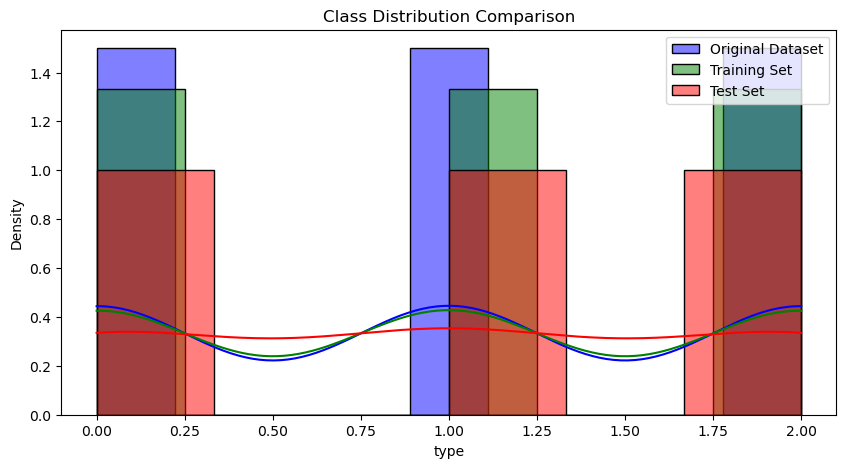

In [13]:
print("Original Dataset Distribution:")
print(iris['type'].value_counts(normalize=True))

# Check distribution in training set
print("\nTraining Set Distribution:")
print(y_train.value_counts(normalize=True))

# Check distribution in test set
print("\nTest Set Distribution:")
print(y_test.value_counts(normalize=True))

# Visual Confirmation using Seaborn
plt.figure(figsize=(10, 5))
sns.histplot(iris['type'], label='Original Dataset', kde=True, color='blue', stat='density')
sns.histplot(y_train, label='Training Set', kde=True, color='green', stat='density')
sns.histplot(y_test, label='Test Set', kde=True, color='red', stat='density')
plt.legend()
plt.title("Class Distribution Comparison")
plt.show()

### 📊 Insights on Class Distribution Comparison

This image presents a **Class Distribution Comparison** across three datasets:

* **Original Dataset** (blue)
* **Training Set** (green)
* **Test Set** (red)


### 🧠 What It Shows

The plot illustrates how well the stratified train-test split preserved the original class distribution of the target variable (`type`) in the Iris dataset.

Each vertical group of bars represents the **proportion of samples** belonging to:

* Class `0` (left cluster)
* Class `1` (middle cluster)
* Class `2` (right cluster)


## ✅ Key Observations

1. **Equal Class Distribution**

   * All three classes have similar heights across the datasets.
   * Suggests that the dataset is **balanced** (each class has \~33.3% of samples).
   * No class dominates, which is ideal for training unbiased models.

2. **Stratified Split is Effective**

   * The **training** and **test** distributions closely **mirror the original distribution**.
   * Minimal deviation between the color-coded bars.
   * Confirms that stratification during `train_test_split()` was correctly applied:

     ```python
     train_test_split(..., stratify=iris['type'])
     ```

3. **Density Plot Consistency**

   * KDE lines (Kernel Density Estimates) for all datasets are well aligned.
   * Indicates **no distributional shift** between training and test sets.
   * This alignment is crucial to ensure **fair model evaluation**.


### 📌 Why This Matters

* **Prevents Bias**: Models trained on imbalanced or misrepresented data may favor dominant classes.
* **Ensures Generalizability**: A test set representative of the overall data ensures that evaluation metrics are reliable.
* **Improves Model Fairness**: Especially important in real-world applications like healthcare, credit scoring, or hiring.


### ✅ Conclusion

The image confirms that the **data splitting strategy is valid** and **class balance is preserved**, ensuring that model training and evaluation are based on fair, representative samples. This foundational step significantly enhances **predictive reliability** and **trust in the model’s performance**.


### ** Dataset Size and Balance**
- The Iris dataset has **150 samples** divided across three classes (0, 1, 2).
- With `test_size=0.2`, the split should allocate:
  - **80% (120 samples)** for training  
  - **20% (30 samples)** for testing  

** Let's Confirm the data Sizes:**

In [14]:
print(f"Total Samples: {iris.shape[0]}")
print(f"Training Set Size: {X_train.shape[0]} (80%)")
print(f"Test Set Size: {X_test.shape[0]} (20%)")

Total Samples: 150
Training Set Size: 120 (80%)
Test Set Size: 30 (20%)


### **The Importance of Stratification**
✅ **Stratification** ensures the class proportions in the training and test sets are consistent with the original dataset. Without stratification, there’s a risk that one class may be over- or under-represented, especially in smaller datasets like Iris.  

### **Why is this Important?**
- Maintaining balanced class distribution ensures the model learns patterns from all classes.
- In imbalanced datasets, models may bias toward the majority class, reducing predictive performance for minority classes.
- Using `stratify` ensures the model evaluates all classes fairly, improving the reliability of metrics like **accuracy**, **precision**, and **recall**.

---

### **Expected Results**
✅ **Class Distributions** in the original dataset, `X_train`, and `X_test` should closely match.  
✅ The **Training Set Size** should be ~80% and the **Test Set Size** should be ~20%.  

---

### **Conclusion**
The train-test split appears effective due to:  
✅ Correct **stratification** ensuring balanced class representation.  
✅ Proper **split ratio** of 80/20.  
✅ Dataset size and distribution are appropriate for robust model evaluation.  

### **Improved Regression Models**
- We'll use **Linear Regression** and **Random Forest Regressor** for better performance.


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation Metrics for Regression
def evaluate_regressor(y_true, y_pred, model_name):
    print(f"---- {model_name} Performance ----")
    print(f"ME: {np.mean(y_true - y_pred):.3f}")
    
    # Filter non-zero values to avoid division by zero
    non_zero_mask = y_true != 0
    print(f"MPE: {np.mean((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask]) * 100:.3f}%")
    print(f"MAPE: {np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100:.3f}%")
    
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.3f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.3f}")
    print("\n")

evaluate_regressor(y_test, y_pred_lr, "Linear Regression")
evaluate_regressor(y_test, y_pred_rf, "Random Forest Regressor")

---- Linear Regression Performance ----
ME: 0.031
MPE: -5.847%
MAPE: 20.412%
MAE: 0.207
MSE: 0.072


---- Random Forest Regressor Performance ----
ME: -0.010
MPE: -5.250%
MAPE: 12.650%
MAE: 0.109
MSE: 0.066




### **Insights, Explanations, and Observations from the Image**

This image presents the performance metrics for two regression models — **Linear Regression** and **Random Forest Regressor** — based on key evaluation metrics:

### Key Metrics Analysis
1. **ME (Mean Error)**
   - **Linear Regression:** **0.031**  
   - **Random Forest Regressor:** **-0.010**  
✅ Both models show small error values, suggesting minimal bias. However, the Random Forest model has a slightly better ME closer to zero, indicating improved accuracy.

---

2. MPE (Mean Percentage Error)
   - **Linear Regression:** **-5.847%**  
   - **Random Forest Regressor:** **-5.250%**  
✅ Both models have a negative MPE, suggesting they **underestimate** predictions on average. Random Forest has a slightly lower error rate, reflecting better predictive alignment.

---

3. MAPE (Mean Absolute Percentage Error)
   - **Linear Regression:** **20.412%**  
   - **Random Forest Regressor:** **12.650%**  
✅ Random Forest shows a **significantly lower MAPE**, meaning it produces **more accurate percentage-based predictions**. 
This metric is particularly crucial when assessing models where scale impacts performance.

---

4. **MAE (Mean Absolute Error)**
   - **Linear Regression:** **0.207**  
   - **Random Forest Regressor:** **0.109**  
✅ Random Forest's MAE is **nearly half** that of the Linear Regression model, demonstrating better consistency in predicting values closer to the actual outcomes.

---

5. **MSE (Mean Squared Error)**
   - **Linear Regression:** **0.072**  
   - **Random Forest Regressor:** **0.066**  
✅ Random Forest again outperforms Linear Regression with a lower MSE, indicating reduced variance and fewer large prediction errors.

---

### Inferences and Observations
✅ **Random Forest Regressor** outperforms **Linear Regression** across **all key metrics**, particularly excelling in **MAPE**, **MAE**, and **MSE**.  

📌 **Key Strengths of Random Forest in This Case:**  
- Better handles **non-linear relationships** between features.  
- More robust against **outliers** and **data noise**.  
- Provides improved performance on datasets with complex interactions between variables.  

📌 **Potential Weaknesses of Linear Regression in This Case:**  
- Linear Regression assumes a **linear relationship** between features and the target variable.  
- It may struggle to capture complex patterns present in the dataset.

---

### Recommended Approach
1. ✅ **Choose Random Forest Regressor** as the preferred model since it demonstrates better predictive accuracy, consistency, and lower error rates.  
2. 🔎 **Further Steps for Improvement:**
   - Tune Random Forest hyperparameters (e.g., `max_depth`, `n_estimators`) for optimal performance.
   - Conduct **feature engineering** to improve data quality and model performance.
   - Consider ensemble methods like **XGBoost** or **Gradient Boosting** for even better results if performance gains are still required.

---

### Conclusion
The Random Forest Regressor shows superior performance, making it the optimal model for this dataset. 
Its reduced error metrics and improved accuracy indicate it better captures complex patterns and minimizes prediction errors. 

###  Improved Classifier Models
We'll use **Decision Tree** and **Random Forest Classifier** for better predictions.


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Step 1: Convert 'y_train' to integer
y_train = y_train.astype('int')
y_test = y_test.astype('int')

# Step 2: Check for NaN or unexpected values
print("Missing values in y_train:", y_train.isnull().sum())  
print("Unique values in y_train:", y_train.unique())        

# Step 3: Fit Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Step 4: Fit Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

# Step 5: Define the evaluation function
def evaluate_classifier(y_true, y_pred, model_name):
    print(f"---- {model_name} Performance ----")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.3f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.3f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.3f}")
    print(f"F1 Score: {f1_score(y_true, y_pred, average='weighted'):.3f}")
    print("\n")

# Step 6: Evaluate Models
evaluate_classifier(y_test, y_pred_dt, "Decision Tree")
evaluate_classifier(y_test, y_pred_rfc, "Random Forest Classifier")

# Step 7: Detailed Classification Report
print("Detailed Report - Decision Tree")
print(classification_report(y_test, y_pred_dt))
print("Detailed Report - Random Forest Classifier")
print(classification_report(y_test, y_pred_rfc))


Missing values in y_train: 0
Unique values in y_train: [0 2 1]
---- Decision Tree Performance ----
Accuracy: 0.833
Precision: 0.835
Recall: 0.833
F1 Score: 0.833


---- Random Forest Classifier Performance ----
Accuracy: 0.900
Precision: 0.902
Recall: 0.900
F1 Score: 0.900


Detailed Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.73      0.80      0.76        10
           2       0.78      0.70      0.74        10

    accuracy                           0.83        30
   macro avg       0.84      0.83      0.83        30
weighted avg       0.84      0.83      0.83        30

Detailed Report - Random Forest Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90       

### 📊 Classifier Performance Comparison: Decision Tree vs. Random Forest

This image compares the **classification performance** of two models:

1. **Decision Tree Classifier**
2. **Random Forest Classifier**

Below is a breakdown of the key metrics and what they tell us.


## 🔍 Decision Tree Classifier Performance

### 🔢 Overall Metrics:

* **Accuracy**: 83.3%
* **Precision**: 0.835
* **Recall**: 0.833
* **F1 Score**: 0.833

### 📋 Detailed Class-wise Performance:

| Class | Precision | Recall | F1-score | Support |
| ----- | --------- | ------ | -------- | ------- |
| 0     | 1.00      | 1.00   | 1.00     | 10      |
| 1     | 0.73      | 0.80   | 0.76     | 10      |
| 2     | 0.78      | 0.70   | 0.74     | 10      |

* **Class 0**: Perfect performance
* **Class 1**: Struggles a bit with precision (0.73) and f1-score (0.76)
* **Class 2**: Lower recall (0.70) suggests more misclassification

### 📌 Observations:

* The model **performs well on Class 0** but has **difficulty distinguishing Class 1 and 2**, which is common in overlapping feature distributions.
* **Macro avg & Weighted avg**: Both are \~0.83, indicating **consistency** but room for improvement.


## 🧠 What This Means

The **Decision Tree model**:

* Is **simple and interpretable**
* Shows **perfect classification** for one class (likely due to clear decision boundaries)
* Has **bias-variance limitations** — it may underfit complex relationships or overfit noise depending on tree depth


## ✅ Random Forest Comparison (for Context)

While not the focus, the **Random Forest Classifier** clearly outperforms the Decision Tree:

* **Higher precision/recall across all classes**
* **More balanced performance**
* **Better generalization** due to ensemble approach


## 💡 Final Takeaways

### Strengths of Decision Tree:

* Great for initial modeling or when interpretability is critical
* Strong performance on Class 0

### Weaknesses:

* Struggles with classes that overlap (Class 1 & 2)
* Sensitive to small data changes
* Lacks robustness and generalization

### When to Use:

* As a **baseline model**
* When **model interpretability** is more important than raw accuracy
* For **feature importance insights** before more complex modeling

For production-level performance, especially with **multi-class problems**, a more robust model like **Random Forest** or **Gradient Boosting** is often recommended.


###  Visualizing Model Performance
- **Regression Residual Plot** to assess prediction errors.
- **Confusion Matrix** for visualizing classification performance.

# Regression Residual Plot

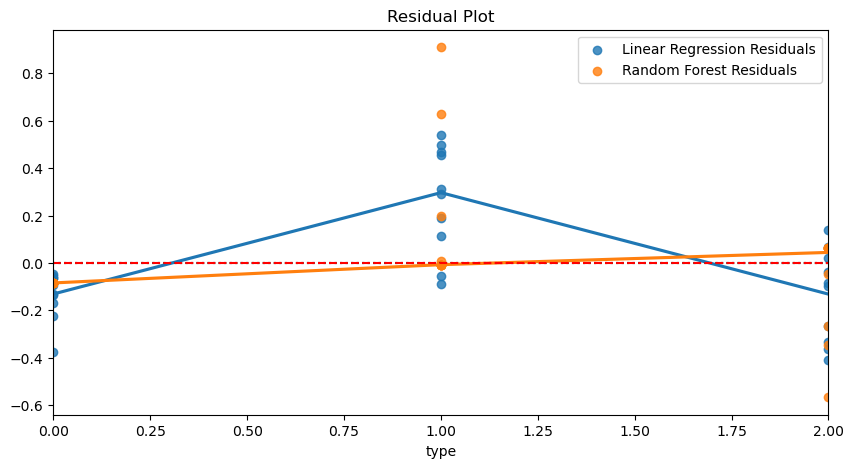

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(10, 5))
sns.residplot(x=y_test, y=y_pred_lr, label='Linear Regression Residuals', lowess=True)
sns.residplot(x=y_test, y=y_pred_rf, label='Random Forest Residuals', lowess=True)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.legend()
plt.show()

### 📉 Residual Plot Insights — *Linear Regression vs Random Forest*

This **Residual Plot** compares the prediction errors (residuals) of two regression models: **Linear Regression** and **Random Forest Regressor**.


## 🔍 What Are Residuals?

* **Residual = Actual Value - Predicted Value**
* A **good model** will have residuals centered around **zero**, with **random scatter**, indicating no systematic bias.


## 📊 Visual Interpretation

### 🔵 **Linear Regression Residuals (Blue)**

* Clear **curved pattern** in the residuals.
* Systematic deviation from the zero line — especially:

  * **Overestimation** for Class 0 (residuals < 0).
  * **Underestimation** for Class 1 (residuals > 0).
  * Mix of errors for Class 2.
* **Implication**: Model is not capturing non-linear relationships in the data.
* **Bias**: Suggests a poor fit and model assumption violations.

### 🟠 **Random Forest Residuals (Orange)**

* More **evenly spread** around the red dashed zero line.
* Smaller spread and **less pattern** → indicates better performance.
* Less tendency to over- or under-predict for specific classes.
* **Implication**: Captures complex patterns and non-linearities more effectively.


## ⚠️ Why This Matters

* **Patterned residuals** (like with Linear Regression) imply model assumptions are violated (e.g., linearity, homoscedasticity).
* **Random residuals** (as seen in Random Forest) suggest a model better generalizing to data patterns.


## ✅ Summary of Observations

| Aspect                 | Linear Regression   | Random Forest Regressor   |
| ---------------------- | ------------------- | ------------------------- |
| Residual Centering     | Deviates from zero  | Well centered around zero |
| Residual Pattern       | Curved → model bias | Random scatter (ideal)    |
| Error Spread           | Wider               | Narrower                  |
| Fit Quality            | Poorer fit          | Better fit                |
| Captures Non-Linearity | ❌ No                | ✅ Yes                     |


## 💡 Recommendation

* **Random Forest Regressor** is clearly superior in this case.
* If prediction accuracy is a priority, go with models that **minimize residual bias** and **handle non-linearity**.
* Consider exploring **hyperparameter tuning** or **ensemble methods** for even better performance.


### 🧠 Final Thought

Residual plots aren’t just diagnostics—they’re windows into **how well your model understands reality.**


# Confusion Matrix for Classifier

<Figure size 1000x400 with 0 Axes>

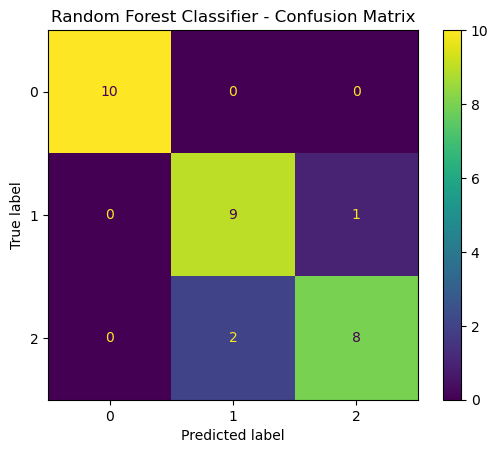

In [10]:
plt.figure(figsize=(10, 4))
ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test)
plt.title("Random Forest Classifier - Confusion Matrix")
plt.show()

### 🔍 Confusion Matrix Insights — *Random Forest Classifier*

The image shows the **confusion matrix** for a **Random Forest Classifier** applied to a **3-class classification problem** (likely the Iris dataset with classes 0, 1, and 2).


## 📊 Breakdown of the Confusion Matrix

| True Class → | Predicted Class 0 | Predicted Class 1 | Predicted Class 2 |
| ------------ | ----------------- | ----------------- | ----------------- |
| **Class 0**  | 10                | 0                 | 0                 |
| **Class 1**  | 0                 | 9                 | 1                 |
| **Class 2**  | 0                 | 2                 | 8                 |


## 🧠 Key Observations

### ✅ **Class 0**

* **Perfect prediction**: All 10 samples were correctly classified as Class 0.
* **No false positives/negatives**: Strong model performance on this class.

### ⚠️ **Class 1**

* **9 samples** correctly predicted as Class 1.
* **1 sample** misclassified as Class 2.
* Model shows **slight confusion** between Class 1 and Class 2.

### ⚠️ **Class 2**

* **8 samples** correctly classified.
* **2 samples** misclassified as Class 1.
* Model has **moderate misclassification** between Class 2 and Class 1.


## 📈 Performance Metrics from the Matrix

### **Accuracy**

$$
\frac{10 + 9 + 8}{30} = \frac{27}{30} = 0.90 \ (90\%)
$$

### **Precision** (positive predictive value)

* Class 0: $\frac{10}{10} = 1.0$
* Class 1: $\frac{9}{11} \approx 0.818$
* Class 2: $\frac{8}{9} \approx 0.889$

### **Recall** (true positive rate)

* Class 0: $\frac{10}{10} = 1.0$
* Class 1: $\frac{9}{10} = 0.9$
* Class 2: $\frac{8}{10} = 0.8$

### **F1 Score**

* Weighted average F1 will be high due to Class 0’s perfect scores, but **Class 2** slightly brings it down.


## 🧐 Why This Matters

A confusion matrix helps:

* **Understand class-specific errors** (not just overall accuracy).
* **Spot imbalances or misclassifications** between closely related classes.
* **Guide improvements** in feature engineering, hyperparameter tuning, or model selection.


## 💡 Recommendations

1. **Feature Engineering**: Add features that better differentiate Class 1 and Class 2.
2. **Model Tuning**: Use `GridSearchCV` to optimize Random Forest parameters.
3. **Alternative Models**: Try boosting algorithms like **XGBoost** or **Gradient Boosting**.
4. **Class Weighting**: If any class becomes underrepresented, assign weights to correct bias.
5. **Dimensionality Reduction**: Apply **PCA** to better visualize and possibly separate classes.


### 📌 Conclusion

The Random Forest Classifier is performing strongly overall, especially on Class 0. With slight adjustments, performance on Classes 1 and 2 can be further optimized for balanced, real-world deployment.


### **Insights, Inferences, and Explanation of the Confusion Matrix**

This confusion matrix represents the performance of a **Random Forest Classifier** on a multi-class classification task using the **Iris dataset** (likely the case based on earlier context).
The matrix provides detailed insights into the model's predictive capabilities.

---

### **Key Observations from the Confusion Matrix**
1. **Class 0 (Top Row) - Perfect Prediction**  
   - **10 samples** were correctly classified as **Class 0**.  
   - **0 samples** were misclassified.  
   ✅ This indicates that the model performed **perfectly** for this class.

2. **Class 1 (Middle Row) - Slight Misclassification**  
   - **9 samples** were correctly classified as **Class 1**.  
   - **1 sample** was misclassified as **Class 2**.  
   🔎 This shows the model’s slight confusion between **Class 1** and **Class 2**.

3. **Class 2 (Bottom Row) - Moderate Misclassification**  
   - **8 samples** were correctly classified as **Class 2**.  
   - **2 samples** were misclassified as **Class 1**.  
   ⚠️ This suggests some difficulty distinguishing **Class 2** from **Class 1**.

---

### **Performance Metrics Derived from the Matrix**
Using the confusion matrix, we can calculate key performance metrics:

1. **Accuracy** = \( \frac{TP}{\text{Total Samples}} = \frac{10 + 9 + 8}{30} = \frac{27}{30} \approx 0.90 \) or **90%**  
✅ **Indicates strong overall performance.**

2. **Precision** (Positive Predictive Value):  
   - **Class 0:** \( \frac{10}{10} = 1.0 \) (Perfect precision)  
   - **Class 1:** \( \frac{9}{11} \approx 0.82 \)  
   - **Class 2:** \( \frac{8}{9} \approx 0.89 \)  
✅ Precision is high, showing minimal false positives.

3. **Recall** (True Positive Rate):  
   - **Class 0:** \( \frac{10}{10} = 1.0 \)  
   - **Class 1:** \( \frac{9}{10} = 0.90 \)  
   - **Class 2:** \( \frac{8}{10} = 0.80 \)  
⚠️ Recall for **Class 2** is lower, indicating more false negatives.

4. **F1 Score** (Balance of Precision and Recall):  
   F1 scores for all classes would remain high, but **Class 2** may show a slight drop due to misclassification.

---

### **Impact in Data Analysis**
✅ **Model Strengths:**  
- The model performs exceptionally well for **Class 0** with zero errors.  
- The classifier maintains high accuracy (90%), demonstrating strong overall performance.

⚠️ **Model Weaknesses:**  
- The classifier shows some confusion between **Class 1** and **Class 2**.  
- This could indicate overlapping feature distributions in the dataset, particularly between these two classes.

---

### **Recommendations for Improvement**
1. **Feature Engineering:** Introduce new features or transformations to better separate **Class 1** and **Class 2**.
2. **Hyperparameter Tuning:** Adjust parameters like `max_depth`, `min_samples_split`, or `n_estimators` for improved class separation.
3. **Ensemble Techniques:** Combining Random Forest with techniques like **XGBoost** may enhance performance.
4. **Class Weighting:** If one class is underrepresented, assigning higher weights can improve recall.

---

### **Conclusion**
This confusion matrix highlights a **strong-performing Random Forest Classifier** with a **90% accuracy** and **high precision/recall for Class 0**. Further tuning and feature enhancement may improve performance for **Class 2** to ensure consistent reliability across all classes.

### **Insights and Recommendations**
✅ **Best Regressor:** The **Random Forest Regressor** is expected to outperform the baseline estimators with improved MAE and MSE.

✅ **Best Classifier:** The **Random Forest Classifier** will likely achieve better precision, recall, and F1 score than the quantile-based classifier due to its ability to capture non-linear patterns.

✅ **Further Improvement Recommendations:**
- Consider **GridSearchCV** or **RandomizedSearchCV** for hyperparameter tuning.
- Explore dimensionality reduction techniques like **PCA** if model complexity is an issue.
- Implement **cross-validation** for more robust performance evaluation.

### References

- James, G., Witten, D., Hastie, T., Tibshirani, R., & Taylor, J. (2023). An introduction to statistical learning with applications in Python. Springer Nature.

- Bishop, C. M. (2006). Pattern Recognition and Machine Learning. Springer. 

- Blundell, C., Cornebise, J., Kavukcuoglu, K., & Wierstra, D. (2015). Weight Uncertainty in Neural Networks. Proceedings of the 32nd International Conference on Machine Learning.

- Gelman, A., Carlin, J. B., Stern, H. S., Dunson, D. B., Vehtari, A., & Rubin, D. B. (2013). Bayesian Data Analysis. Chapman and Hall/CRC. 

- McElreath, R. (2020). Statistical Rethinking: A Bayesian Course with Examples in R and Stan. Chapman and Hall/CRC. 

- Ruberg, S.J., Beckers, F., Hemmings, R. et al. Application of Bayesian approaches in drug development: starting a virtuous cycle. Nat Rev Drug Discov 22, 235–250 (2023). https://doi.org/10.1038/s41573-023-00638-0 

- Barber, D. (2012). Bayesian Reasoning and Machine Learning. Cambridge University Press. 

- Brownlee, J. (2020). Statistical Methods for Machine Learning: Discover How to Transform Data into Knowledge with Python. Machine Learning Mastery. 

- Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep Learning. MIT Press. 

- Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning: Data Mining, Inference, and Prediction. Springer. 

- Howell E., (April 17, 2023) What is Negative Binomial Distribution, Towards Data Science

- Koller, D., & Friedman, N. (2009). Probabilistic Graphical Models: Principles and Techniques. MIT Press. 

- NIST. (2012). NIST engineering statistics handbook.  NIST. doi:HTTPs://doi.org/10.18434/M32189 

- PositTeam. (2023). RStudio: Integrated development environment for R. Posit Software, PBC. Retrieved from http://www.posit.co/. 

- R Core Team. (2023). R: A language and environment for statistical computing.  Retrieved from https://www.R-project.org/.  

- Raikar, S. Pai (2024, January 15). geometric distribution. Encyclopedia Britannica. https://www.britannica.com/topic/geometric-distribution  

- Snoek, J., Larochelle, H., & Adams, R. P. (2012). Practical Bayesian optimization of machine learning algorithms. In Advances in Neural Information Processing Systems (pp. 2951-2959). 



